<div style="text-align: center;">
  <img width="240" height="240" src="https://www.naterscreations.com/imputegap/logo_imputegab.png" />
</div>
<h1>ImputeGAP: Tutorial</h1>
<h6>Notebook 2: Imputer</h6>





# 1.&nbsp;Installation


ImputeGAP is a comprehensive end-to-end imputation library that covers the whole imputation workflow, from data collection to explaining the results and their implications. It consists of two interconnected components: the imputation module and the advanced analysis module. These components can be used together through a standardized and configuration-based pipeline, or separately via independent instantiation. The documentation is available on: https://imputegap.readthedocs.io/.
This notebook showcases key steps of the imputation: imputation pipeline synthesis and advanced analysis. Before getting started, please make sure to install the library along with the required Jupyter dependencies:

In [ ]:
%pip install imputegap==1.1.1

In [ ]:
%pip install -U ipywidgets

In [ ]:
import pandas as pd
def imputegap_jupyter(matrix):
    df = pd.DataFrame(matrix).head(10).reset_index(drop=True)
    df.index += 1  # Start index at 1 instead of 0
    return df.style.format(precision=2)

# 4.&nbsp;Imputation

In this section, we will illustrate how to impute the contaminated time series. Our library implements five families of imputation algorithms: Statistical, Machine Learning, Matrix Completion, Deep Learning, and Pattern Search.

All algorithms developed in ImputeGAP are available in the ``ts.algorithms`` module, which can be listed as follows:


In [1]:
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils
ts = TimeSeries()

In [2]:
ts.algorithms_with_families

['DeepLearning.BRITS',
 'DeepLearning.BayOTIDE',
 'DeepLearning.BitGraph',
 'DeepLearning.DeepMVI',
 'DeepLearning.GAIN',
 'DeepLearning.GRIN',
 'DeepLearning.HKMF_T',
 'DeepLearning.MPIN',
 'DeepLearning.MRNN',
 'DeepLearning.MissNet',
 'DeepLearning.PRISTI',
 'LLMs.GPT4TS',
 'LLMs.NuwaTS',
 'MachineLearning.IIM',
 'MachineLearning.MICE',
 'MachineLearning.MissForest',
 'MachineLearning.XGBOOST',
 'MatrixCompletion.CDRec',
 'MatrixCompletion.GROUSE',
 'MatrixCompletion.IterativeSVD',
 'MatrixCompletion.ROSL',
 'MatrixCompletion.SPIRIT',
 'MatrixCompletion.SVT',
 'MatrixCompletion.SoftImpute',
 'MatrixCompletion.TRMF',
 'PatternSearch.DynaMMo',
 'PatternSearch.STMVL',
 'PatternSearch.TKCM',
 'Statistics.Interpolation',
 'Statistics.KNNImpute',
 'Statistics.MeanImpute',
 'Statistics.MeanImputeBySeries',
 'Statistics.MinImpute',
 'Statistics.ZeroImpute']

We will illusrate the imputation performed by the CDRec technique from Matrix Completion of the BAFU datat with MCAR missing blocks.

First, load the data:

In [5]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the dataset
ts.load_series(utils.search_path("chlorine"))
ts.normalize(normalizer="z_score")

# plot the recovered time series
ts.plot(input_data=ts.data)
%matplotlib inline
ts.plots.show()


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/chlorine.txt

> logs: normalization (z_score) of the data - runtime: 0.0006 seconds

plots saved in: ./imputegap_assets/25_08_04_22_13_44_imputegap_plot.jpg


<br>

Second, contaminate the data:


(CONT) missigness pattern: MCAR
	selected series: 14, 18, 20, 26, 27, 31, 33, 40, 46, 49
	percentage of contaminated series: 20.0%
	rate of missing data per series: 20.0%
	block size: 10
	security offset: [0-100]
	seed value: 42

plots saved in: ./imputegap_assets/imputation/25_08_04_22_14_42_imputegap_plot.jpg


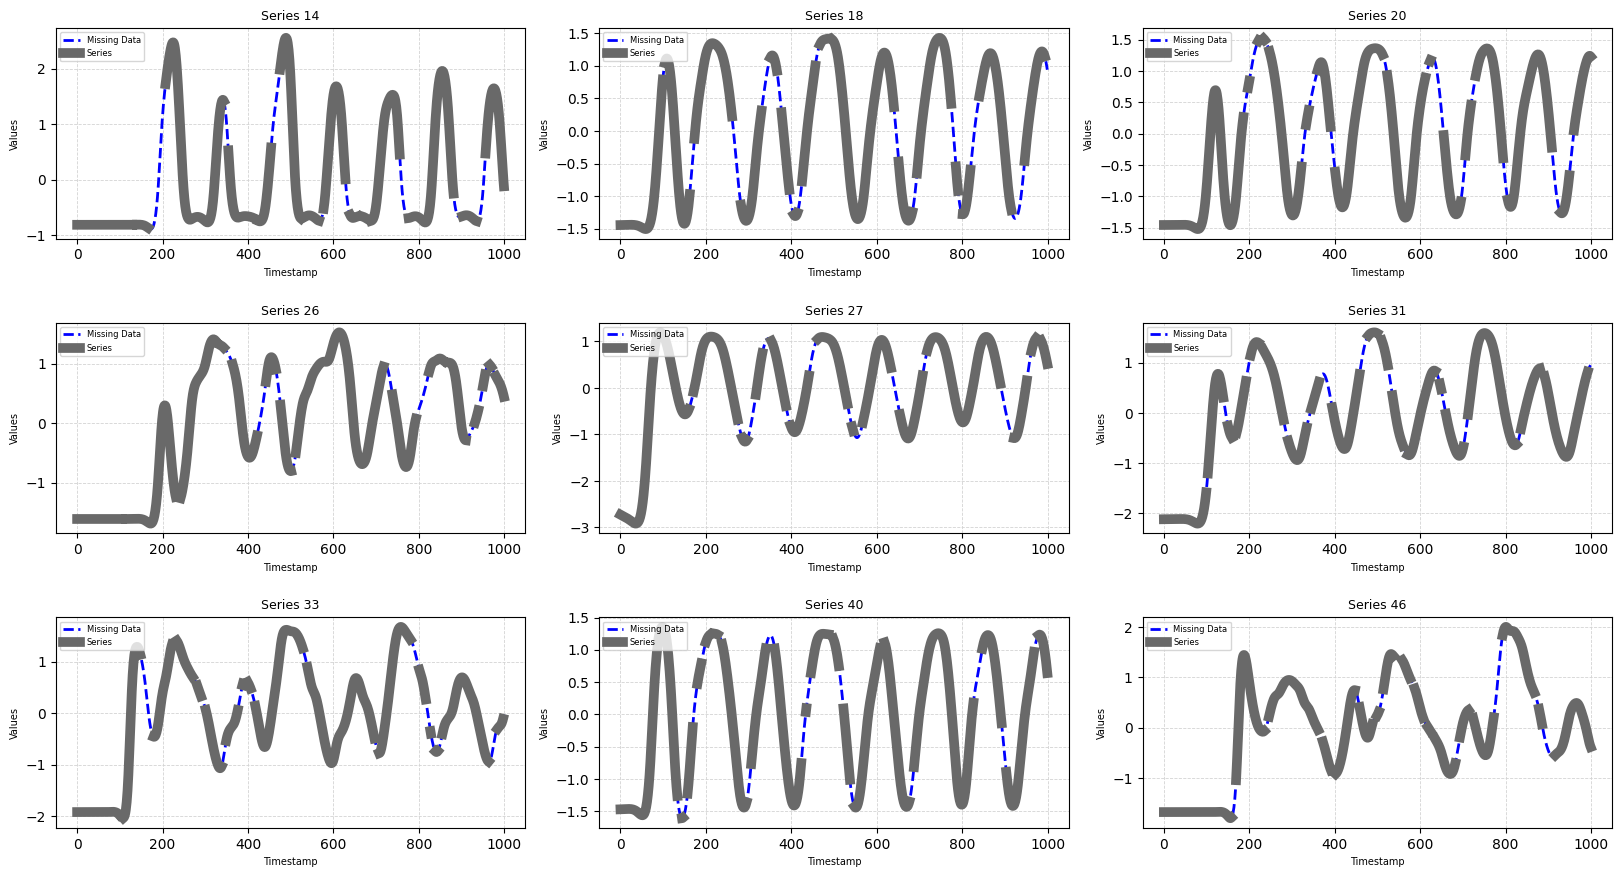

In [7]:
# contaminate the time series
ts_m = ts.Contamination.mcar(ts.data)
ts.plot(input_data=ts.data, incomp_data=ts_m, nbr_series=9, subplot=True, save_path="./imputegap_assets/imputation")
%matplotlib inline
ts.plots.show()

<br>

Finally, impute the data:


(IMPUTATION) CDRec
	Matrix: 50, 1000
	truncation rank: 3
	epsilon: 1e-06
	iterations: 100

> logs: imputation cdrec - Execution Time: 1.3857 seconds.

Results :
RMSE                 = 0.4329813561559917
MAE                  = 0.3159942146522041
MI                   = 0.6904680702628925
CORRELATION          = 0.8575506800059738

plots saved in: ./imputegap_assets/imputation/25_08_04_22_14_50_cdrec_plot.jpg


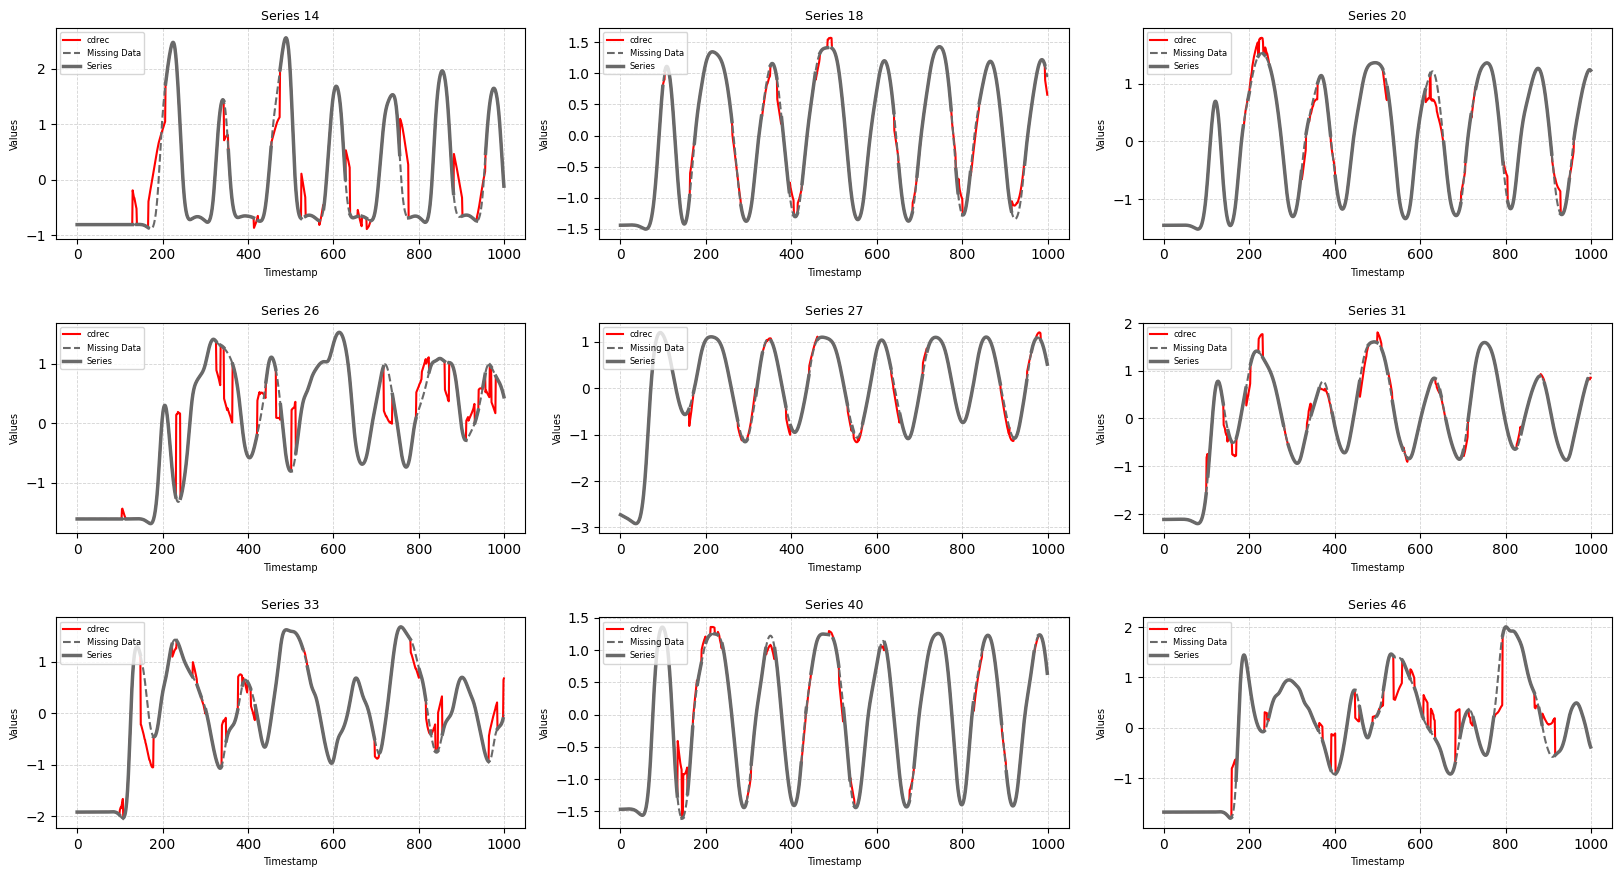

In [8]:
imputer = Imputation.MatrixCompletion.CDRec(ts_m)
imputer.impute()

# compute and print the imputation metrics
imputer.score(ts.data, imputer.recov_data)
ts.print_results(imputer.metrics)

# plot the recovered time series
ts.plot(input_data=ts.data, incomp_data=ts_m, recov_data=imputer.recov_data, nbr_series=9, subplot=True, algorithm=imputer.algorithm, save_path="./imputegap_assets/imputation")
%matplotlib inline
ts.plots.show()

<br>


Now, let's see the result for a new pattern of contamination.


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/chlorine.txt

> logs: normalization (z_score) of the data - runtime: 0.0006 seconds

(CONT) missigness pattern: ALIGNED
	percentage of contaminated series: 20.0%
	rate of missing data per series: 20.0%
	security offset: [0-100]
	index impacted : 100 -> 300

(IMPUTATION) CDRec
	Matrix: 50, 1000
	truncation rank: 3
	epsilon: 1e-06
	iterations: 100

> logs: imputation cdrec - Execution Time: 1.1990 seconds.

Results :
RMSE                 = 0.7584380987351693
MAE                  = 0.5549841146876806
MI                   = 0.7924083930767578
CORRELATION          = 0.7723618555777987

plots saved in: ./imputegap_assets/imputation/25_08_04_20_02_33_cdrec_plot.jpg


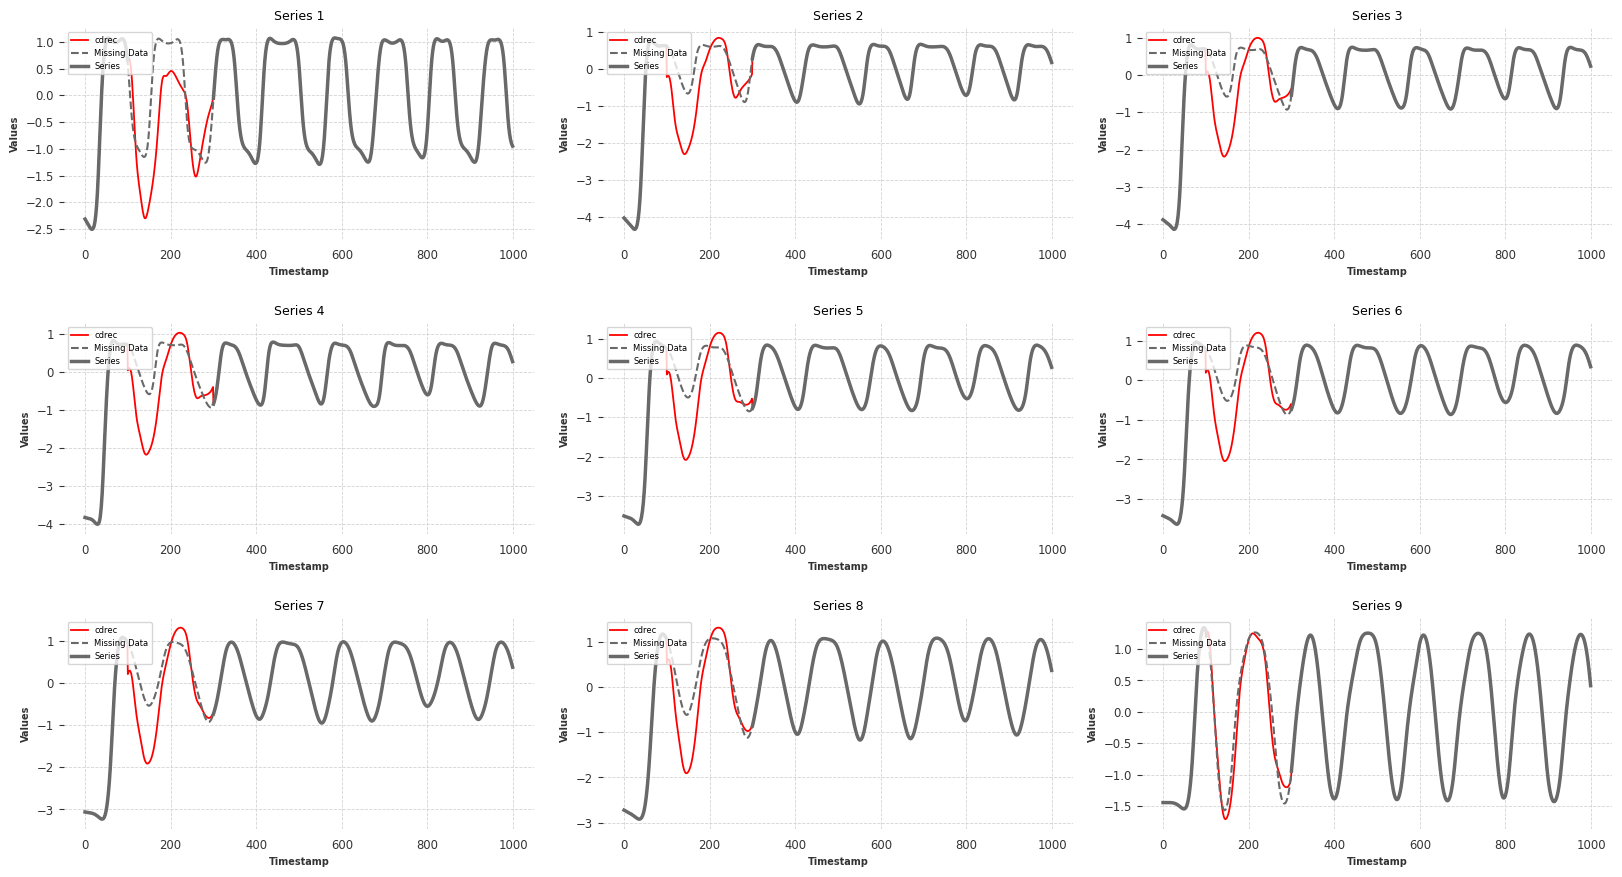

In [55]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the dataset
ts.load_series(utils.search_path("chlorine"))
ts.normalize(normalizer="z_score")

# contaminate the time series
ts_m = ts.Contamination.aligned(ts.data)

# impute the contaminated series
imputer = Imputation.MatrixCompletion.CDRec(ts_m)
imputer.impute()

# compute and print the imputation metrics
imputer.score(ts.data, imputer.recov_data)
ts.print_results(imputer.metrics)

# plot the recovered time series
ts.plot(input_data=ts.data, incomp_data=ts_m, recov_data=imputer.recov_data, nbr_series=9, subplot=True, algorithm=imputer.algorithm, save_path="./imputegap_assets/imputation")
%matplotlib inline
ts.plots.show()

<br>


In [56]:
imputegap_jupyter(imputer.recov_data)

<br>


# 5.&nbsp;AutoML Parameter Tuning

mputeGAP includes a component for managing algorithm configuration and hyperparameter tuning. This component leverages various AutoML optimizers (search algorithms) to perform parameter optimization.


All the optimizers provided by the library are accessible through the `ts.optimizers` module and include the following:

In [57]:
ts.optimizers

['bayesian', 'greedy', 'particle_swarm', 'ray_tune', 'successive_halving']

Parameters are specified by supplying a dictionary that includes the ground truth, the selected optimizer, and the corresponding optimizer options.

## 5.1&nbsp;Bayesian Optimization

We illustre the parameter tuning using the Bayesian Optimization (BO) technique.

In [58]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the dataset
ts.load_series(utils.search_path("chlorine"))
ts.normalize(normalizer="z_score")

# contaminate and impute the time series
ts_m = ts.Contamination.mcar(ts.data)
imputer = Imputation.MatrixCompletion.CDRec(ts_m)

# use Ray Tune to fine tune the imputation algorithm
imputer.impute(user_def=False, params={"input_data": ts.data, "optimizer": "bayesian"})


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/chlorine.txt

> logs: normalization (z_score) of the data - runtime: 0.0006 seconds

(CONT) missigness pattern: MCAR
	selected series: 14, 18, 20, 26, 27, 31, 33, 40, 46, 49
	percentage of contaminated series: 20.0%
	rate of missing data per series: 20.0%
	block size: 10
	security offset: [0-100]
	seed value: 42

(OPTI) optimizer bayesian has been called with cdrec ...


(IMPUTATION) CDRec
	Matrix: 50, 1000
	truncation rank: 8
	epsilon: 0.00015566861063982882
	iterations: 857


(IMPUTATION) CDRec
	Matrix: 50, 1000
	truncation rank: 5
	epsilon: 0.2569137669362513
	iterations: 934


> logs: optimization bayesian - Execution Time: 0.9935 seconds


(IMPUTATION) CDRec
	Matrix: 50, 1000
	truncation rank: 8
	epsilon: 0.00015566861063982882
	iterations: 857

> logs: imputation cdrec - Execution Time: 1.0137 seconds.


In [59]:
imputer.parameters

(8, 0.00015566861063982882, 857)

In [60]:
# compute the imputation metrics with optimized parameter values
imputer.score(ts.data, imputer.recov_data)

# compute the imputation metrics with default parameter values
imputer_def = Imputation.MatrixCompletion.CDRec(ts_m).impute()
imputer_def.score(ts.data, imputer_def.recov_data)

# print the imputation metrics with default and optimized parameter values
ts.print_results(imputer_def.metrics, text="Default values")
ts.print_results(imputer.metrics, text="Optimized values")

# save hyperparameters
utils.save_optimization(optimal_params=imputer.parameters, algorithm=imputer.algorithm, dataset="eeg-alcohol", optimizer="ray_tune")


(IMPUTATION) CDRec
	Matrix: 50, 1000
	truncation rank: 3
	epsilon: 1e-06
	iterations: 100

> logs: imputation cdrec - Execution Time: 0.7136 seconds.

Default values :
RMSE                 = 0.4329813561559917
MAE                  = 0.3159942146522041
MI                   = 0.6904680702628925
CORRELATION          = 0.8575506800059738

Optimized values :
RMSE                 = 0.2666260459857453
MAE                  = 0.17136177471649744
MI                   = 1.0638816327946485
CORRELATION          = 0.9501815284364159

(SYS) Optimization parameters successfully saved to ./imputegap_assets/params/optimal_parameters_ray_tune_eeg-alcohol_cdrec.toml


## 5.1&nbsp;Ray Tune

The library also supports integration with the popular Ray Tune framework.



In [ ]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the dataset
ts.load_series(utils.search_path("chlorine"))
ts.normalize(normalizer="z_score")

# contaminate and impute the time series
ts_m = ts.Contamination.mcar(ts.data, rate_dataset=0.6)
imputer = Imputation.MatrixCompletion.CDRec(ts_m)

# use Ray Tune to fine tune the imputation algorithm
imputer.impute(user_def=False, params={"input_data": ts.data, "optimizer": "ray_tune"})

In [62]:
# compute the imputation metrics with optimized parameter values
imputer.score(ts.data, imputer.recov_data)

# compute the imputation metrics with default parameter values
imputer_def = Imputation.MatrixCompletion.CDRec(ts_m).impute()
imputer_def.score(ts.data, imputer_def.recov_data)

# print the imputation metrics with default and optimized parameter values
ts.print_results(imputer_def.metrics, text="Default values")
ts.print_results(imputer.metrics, text="Optimized values")

# save hyperparameters
utils.save_optimization(optimal_params=imputer.parameters, algorithm=imputer.algorithm, dataset="eeg-alcohol", optimizer="ray_tune")


(IMPUTATION) CDRec
	Matrix: 50, 1000
	truncation rank: 3
	epsilon: 1e-06
	iterations: 100

> logs: imputation cdrec - Execution Time: 0.8850 seconds.

Default values :
RMSE                 = 0.4399721112227659
MAE                  = 0.3144805742804254
MI                   = 0.6417531196032767
CORRELATION          = 0.85800791533426

Optimized values :
RMSE                 = 0.28036938287793495
MAE                  = 0.15494811131186517
MI                   = 1.097970383137877
CORRELATION          = 0.9464360723289769

(SYS) Optimization parameters successfully saved to ./imputegap_assets/params/optimal_parameters_ray_tune_eeg-alcohol_cdrec.toml


The parameters used and their corresponding values can be displayed as follows:

In [41]:
imputer.parameters

(12, 0.003094926635755747, 50)

<br>



plots saved in: ./imputegap_assets/imputation/25_08_04_20_06_13_cdrec_plot.jpg


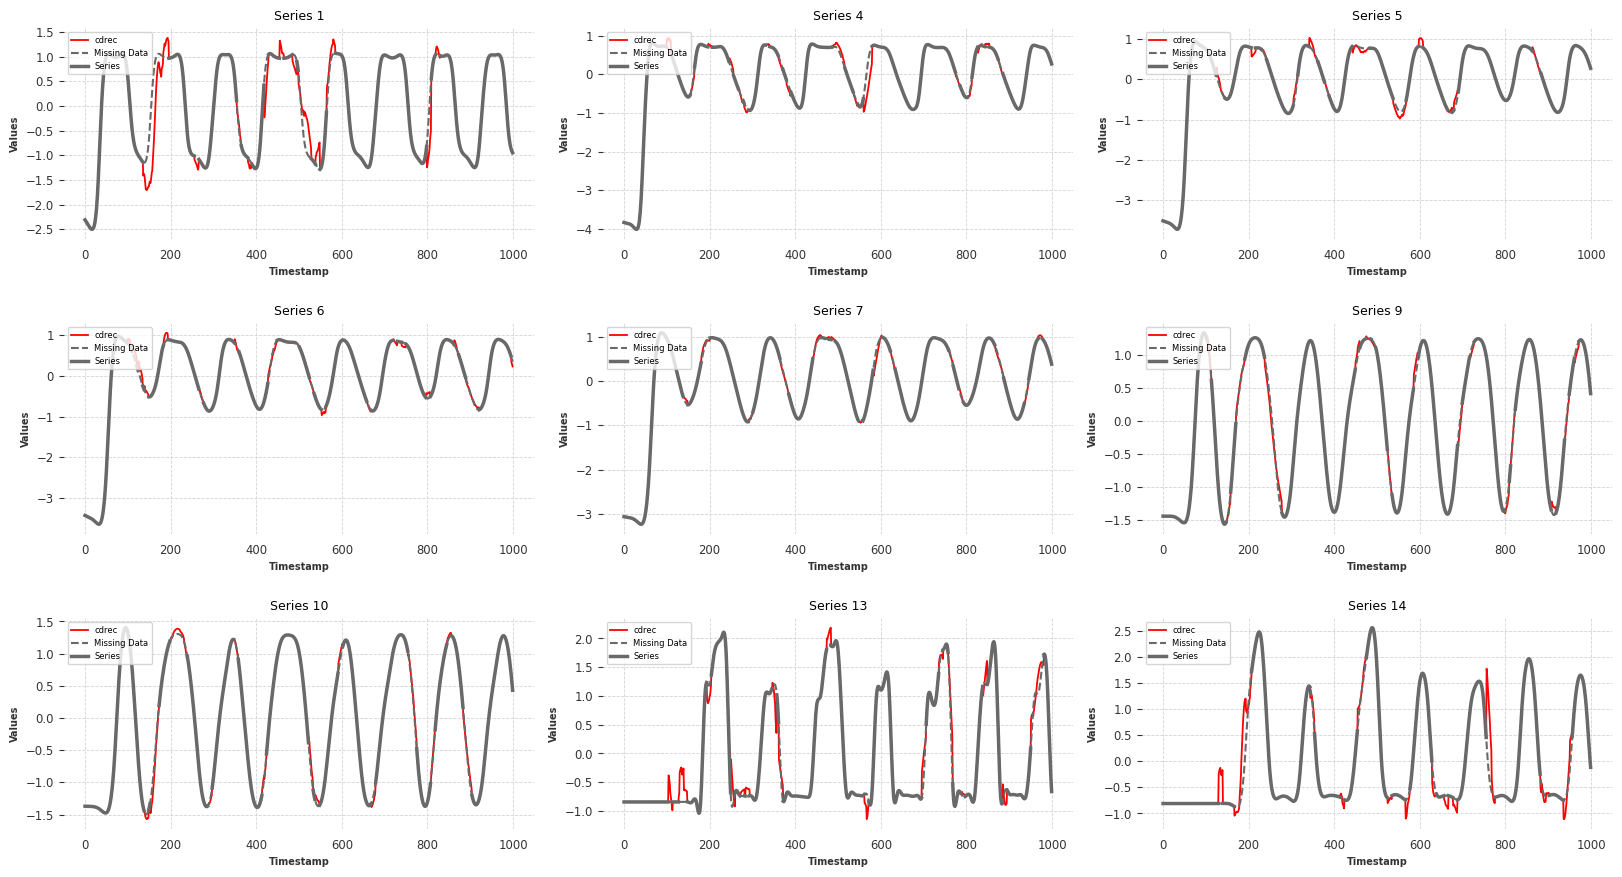

In [63]:
# plot the recovered time series
ts.plot(input_data=ts.data, incomp_data=ts_m, recov_data=imputer.recov_data, nbr_series=9, subplot=True, algorithm=imputer.algorithm, save_path="./imputegap_assets/imputation")

%matplotlib inline
ts.plots.show()

The range of parameter values provided to the AutoML technique can be customized as needed.

In [ ]:
from ray import tune
RAYTUNE_PARAMS = {
    'cdrec': {
        "rank": tune.grid_search([i for i in range(2, 16, 1)]),
        "eps": tune.loguniform(1e-6, 1),
        "iters": tune.grid_search([i * 50 for i in range(1, 4)])
    }
}

<br>

More KDD tutorials: https://imputegap-tutorials.github.io/KDD-2025/html/slides_codes.html

<br>
